<img src=https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png width="500">

# **Entrega Final del Proyecto**
### **Programación para Análisis de Datos**
Ingenieria y Ciencia de Datos  29/04/2024

752224 Aissa Berenice Gonzalez Fosado 

Docente: Ivan Reyes Amezcua

## Resumen del Proyecto

# ***Explorando la Mortalidad Global:***  *Visualización y pronósticos de causas de muerte por País.*
Este proyecto busca explorar y visualizar los hallazgos del estudio de la Carga Global de Enfermedad (GBD, por sus siglas en inglés), que abarca datos sobre causas de muerte y sus tendencias anuales desde 1990 hasta 2019. Utilizando este conjunto de datos, nuestro objetivo es crear visualizaciones del comportamiento de las cifras a través de los años y pronosticar los datos para la próxima década. La fuente del dataset es https://vizhub.healthdata.org/gbd-results/ con los datos del estudio GBD recopilados hasta 2019.  Contiene 32 causas de muerte y un filtrado de Países con sus códigos y las cantidades de muertes correspondientes. El producto final puede ser revisado a traves de la aplicacion de streamlit: https://project-exploring-global-mortality.streamlit.app/#exploring-global-mortality-visualization-and-forecasting-of-death-causes-by-country


### **EDA**

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/deaths_data.csv")
df

,Entity,Code,Year,Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,Interpersonal violence,...,Chronic kidney disease,Poisoning,Protein-energy malnutrition,Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Measles
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,9807
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,10228
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,12144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,720
6266,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,432
6267,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,307
6268,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,402


In [163]:
print("Tipos de datos\n",df.dtypes)

Tipos de datos
 Entity                                        object
Code                                          object
Year                                           int64
Meningitis                                     int64
 Alzheimer's disease and other dementias       int64
Parkinson's disease                            int64
Nutritional deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal violence                         int64
Maternal disorders                             int64
HIV/AIDS                                       int64
Drug use disorders                             int64
Tuberculosis                                   int64
Cardiovascular diseases                        int64
Lower respiratory infections                   int64
Neonatal disorders                             int64
Alcohol use disorders                          int64
Self-harm                     

In [164]:
print("Columnas\n",df.columns)

Columnas
 Index(['Entity', 'Code', 'Year', 'Meningitis',
       ' Alzheimer's disease and other dementias', 'Parkinson's disease',
       'Nutritional deficiencies', 'Malaria', 'Drowning',
       'Interpersonal violence', 'Maternal disorders', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Cardiovascular diseases',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Self-harm', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Neoplasms', 'Conflict and terrorism', 'Diabetes mellitus',
       'Chronic kidney disease', 'Poisoning', 'Protein-energy malnutrition',
       'Road injuries', 'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Fire, heat, and hot substances', 'Acute hepatitis', 'Measles'],
      dtype='object')


#### Division de datos globales y por paises

In [165]:
df_world = df[df['Entity'] == 'World']
df_country = df.drop(df[df['Entity'] == 'World'].index)

#### Estadistica Sumaria

In [166]:
print(df_country.describe())

              Year    Meningitis   Alzheimer's disease and other dementias  \
count  6240.000000   6240.000000                               6240.000000   
mean   2004.500000   1688.487500                               4892.467628   
std       8.656135   6611.317469                              18088.133759   
min    1990.000000      0.000000                                  0.000000   
25%    1997.000000     15.000000                                 96.000000   
50%    2004.500000    107.000000                                685.500000   
75%    2012.000000    792.250000                               2461.750000   
max    2019.000000  98358.000000                             320715.000000   

       Parkinson's disease  Nutritional deficiencies        Malaria  \
count          6240.000000                6240.00000    6240.000000   
mean           1179.279647                2211.06250    4061.326282   
std            4581.069725               10386.77047   18258.534583   
min          

#### Insights y Visualizaciones

Top 10 causas de muerte

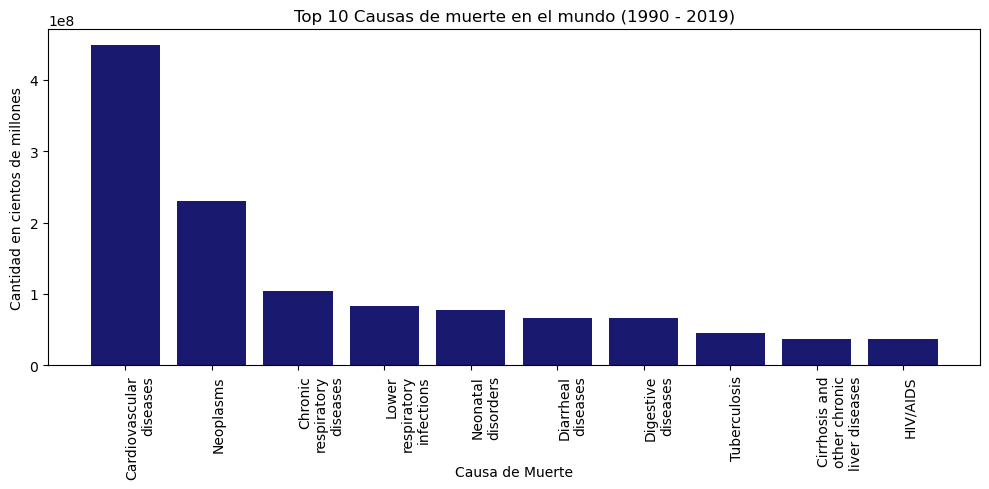

In [167]:
column_sums = df_world.iloc[:, 3:].sum().sort_values(ascending=False)

top_ten_columns = column_sums.head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_ten_columns.index, top_ten_columns.values, color = 'midnightblue')
plt.xlabel('Causa de Muerte',labelpad=-10)
plt.ylabel('Cantidad en cientos de millones')
plt.title('Top 10 Causas de muerte en el mundo (1990 - 2019)')
plt.xticks(rotation=90, ha='right', wrap=True)
plt.tight_layout()

plt.savefig('../reports/figures/top_10_causas_de_muerte.jpg', dpi=300)

plt.show()



Causas de Muerte a traves del tiempo

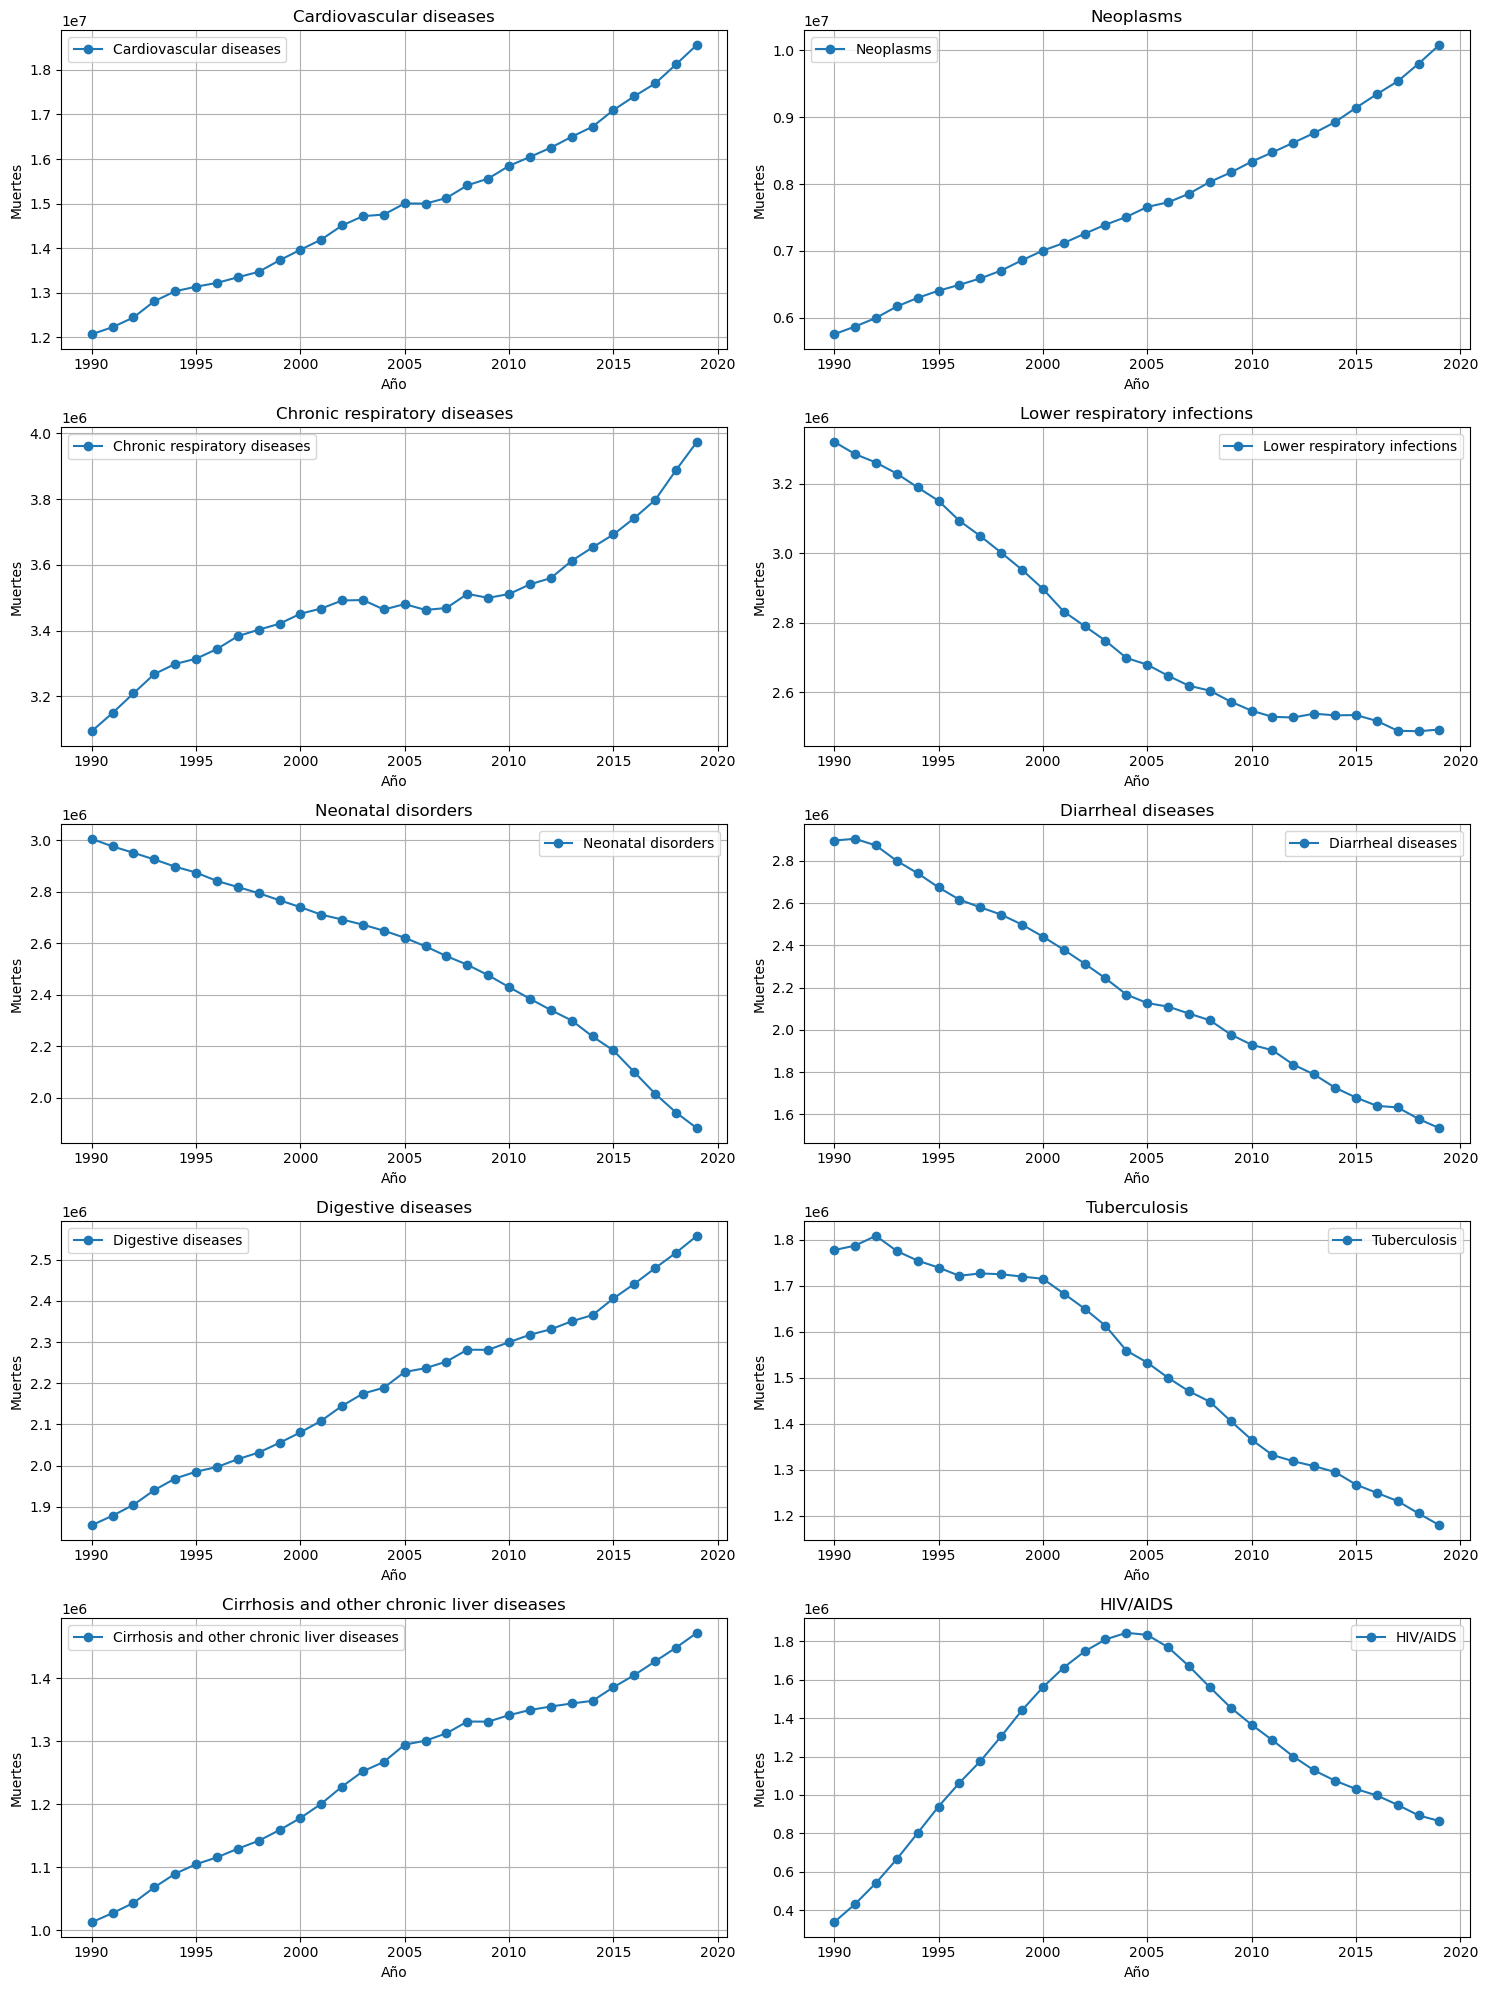

In [168]:
causes = df_world.drop(['Entity', 'Code', 'Year'], axis=1).columns
yearly_deaths_by_cause = df_world.groupby('Year')[causes].sum()
top_causes = yearly_deaths_by_cause.sum().sort_values(ascending=False).head(10).index

# Plot trends for the top 10 causes of death
fig, axs = plt.subplots(5, 2, figsize=(15, 20), facecolor='white')
axs = axs.flatten()

for i, cause in enumerate(top_causes):
    axs[i].plot(yearly_deaths_by_cause.index, yearly_deaths_by_cause[cause], label=cause, marker='o', linestyle='-')
    axs[i].set_title(cause)
    axs[i].set_xlabel('Año')
    axs[i].set_ylabel('Muertes')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()

plt.savefig('../reports/figures/top_10_causas_de_muerte_a_traves_de_los_años.jpg', dpi=300)

plt.show()

Impacto de la vacunación en el sarampión

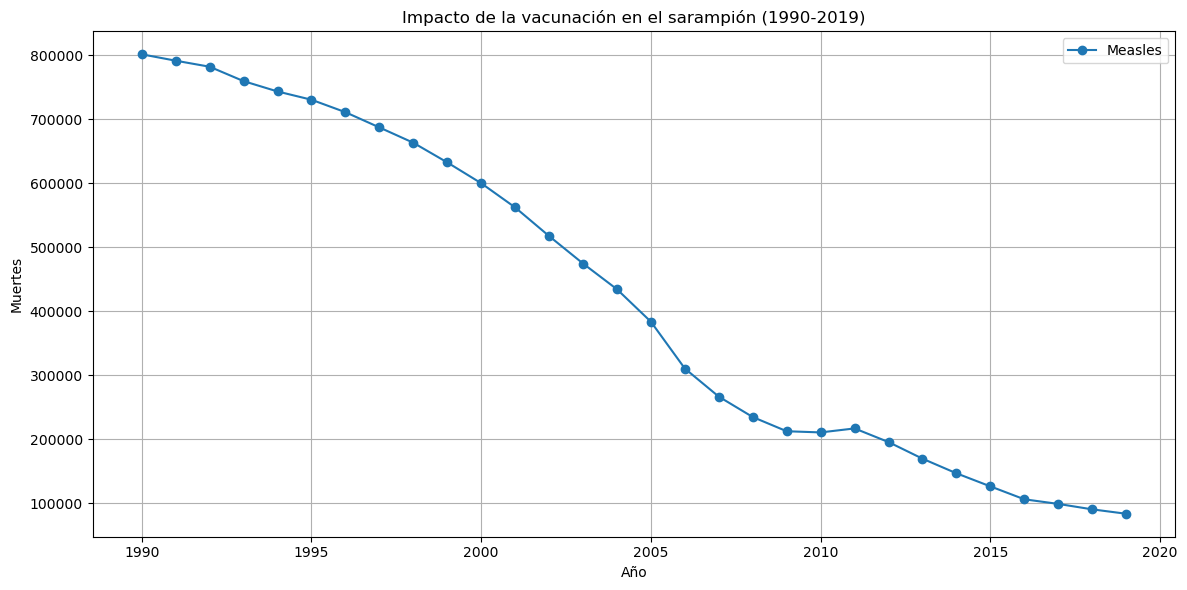

In [169]:
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(df_world.groupby('Year')['Measles'].sum(), label='Measles', marker='o', linestyle='-')
plt.title('Impacto de la vacunación en el sarampión (1990-2019)')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('../reports/figures/impacto_de_la_vacunación_en_el_sarampion.jpg', dpi=300)

plt.show()


Muertes Por Enfermedades cronicas

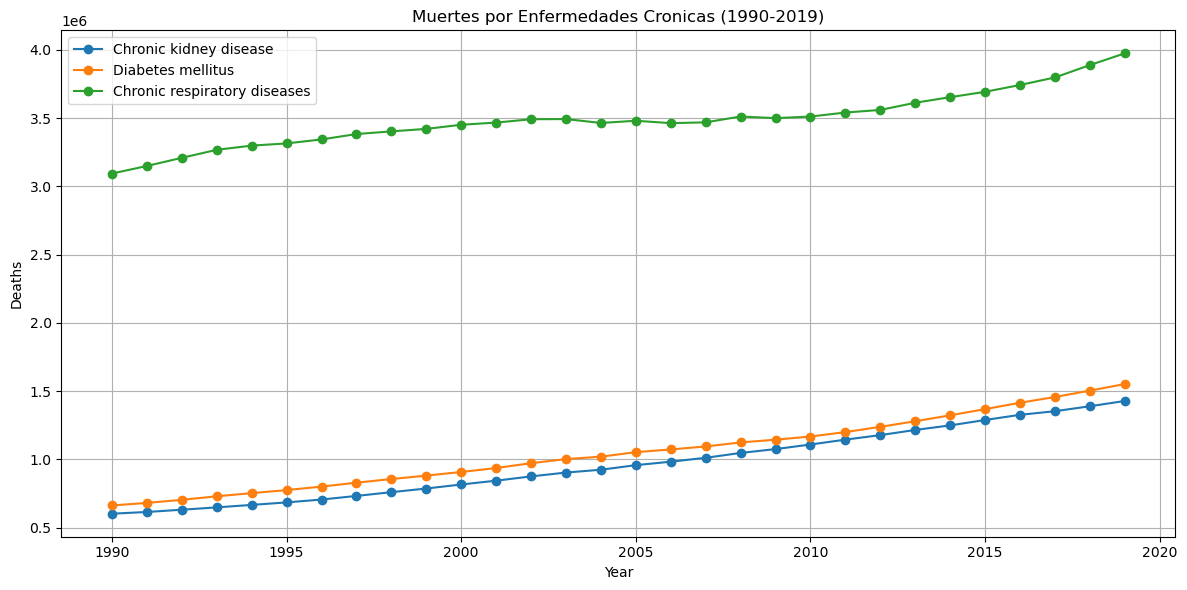

In [170]:
plt.figure(figsize=(12, 6), facecolor='white')
plt.plot(df_world.groupby('Year')['Chronic kidney disease'].sum(), label='Chronic kidney disease', marker='o', linestyle='-')
plt.plot(df_world.groupby('Year')['Diabetes mellitus'].sum(), label='Diabetes mellitus', marker='o', linestyle='-')
plt.plot(df_world.groupby('Year')['Chronic respiratory diseases'].sum(), label='Chronic respiratory diseases', marker='o', linestyle='-')
plt.title('Muertes por Enfermedades Cronicas (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('../reports/figures/muertes_enfermedades_cronicas.jpg', dpi=300)

plt.show()


Muertes totales por pais (1990-2019)

In [171]:
df_country['Total Deaths'] = df_country.iloc[:, 3:].sum(axis=1)
top_countries = df_country.groupby('Entity')['Total Deaths'].sum().sort_values(ascending=False).head(10)

print(top_countries)

Entity
China            265670156
India            240750500
United States     71197834
Russia            59591216
Nigeria           45257230
Indonesia         44309737
Pakistan          39330858
Brazil            32674370
Japan             31923016
Germany           25559699
Name: Total Deaths, dtype: int64


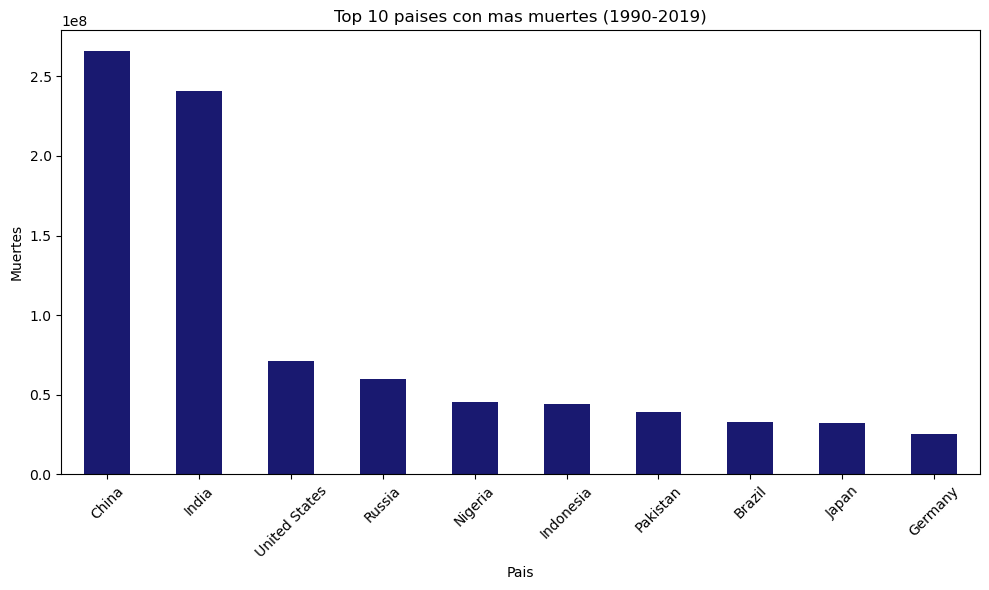

In [172]:
plt.figure(figsize=(10, 6), facecolor='white')
top_countries.plot(kind='bar', color = 'midnightblue')
plt.title('Top 10 paises con mas muertes (1990-2019)')
plt.ylabel('Muertes')
plt.xlabel('Pais')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../reports/figures/top_10_paises_muertes.jpg', dpi=300)

plt.show()

Top 5 Muertes a traves del tiepo (1990-2019)

Top 5 Causes of Death: ['Total Deaths', 'Cardiovascular diseases', 'Neoplasms', 'Chronic respiratory diseases', 'Lower respiratory infections']


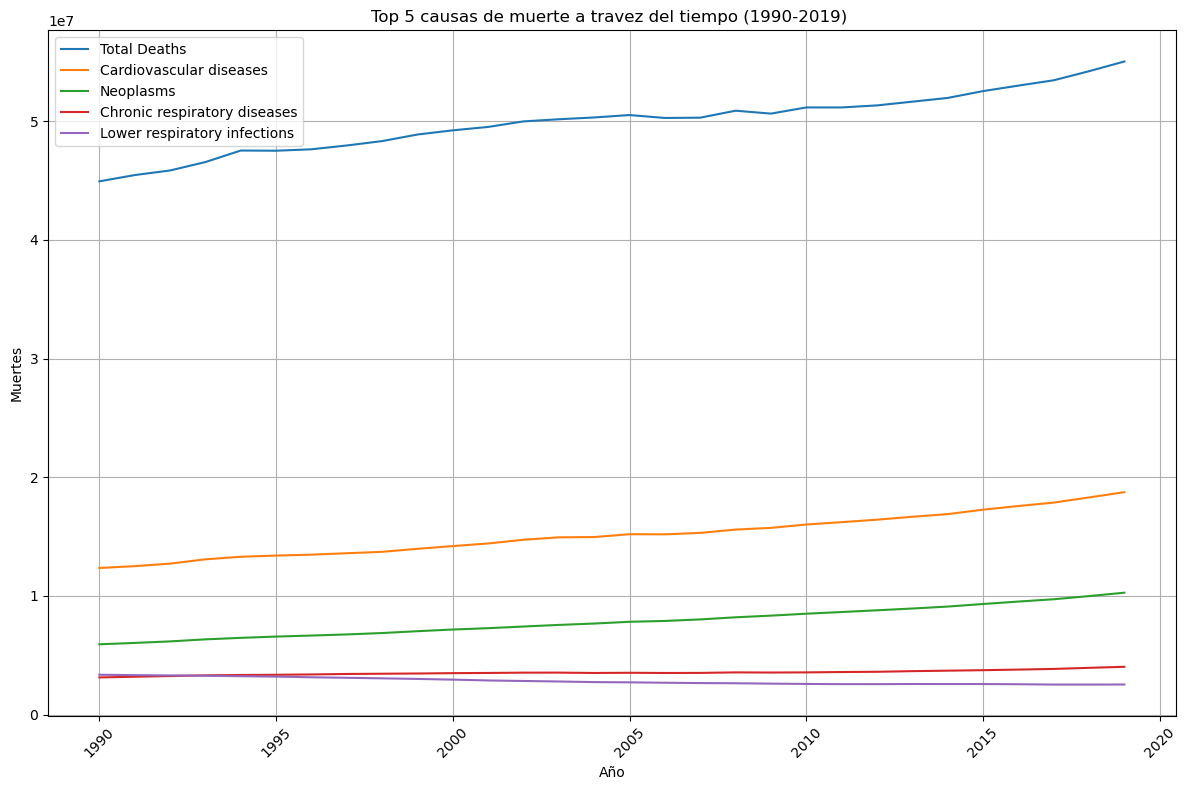

In [176]:
yearly_totals = df_country.groupby('Year').sum()
yearly_totals.drop(['Entity', 'Code'], axis=1, inplace=True, errors='ignore')
top_causes = yearly_totals.sum().sort_values(ascending=False).head(5).index.tolist()
print('Top 5 Causes of Death:', top_causes)
plt.figure(figsize=(12, 8), facecolor='white')

for cause in top_causes:
    plt.plot(yearly_totals.index, yearly_totals[cause], label=cause)

plt.title('Top 5 causas de muerte a travez del tiempo (1990-2019) ')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../reports/figures/top_5_causas_a_travez_del_tiempo.jpg', dpi=300)


plt.show()